|Nombre|Carnet|
|-----|-----|
|Henry Marinao Ambrocio Terraza Perez|20196562|

# Tarea 3

Se importan las librerias a usar

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se crea funcion para obtener los datos

In [10]:
def robust_read_csv(path):
    try:
        df = pd.read_csv(path)
        if df.shape[1] == 1:
            raise ValueError("CSV con delimitador incorrecto, reintentando con ;")
        return df
    except Exception:
        return pd.read_csv(path, sep=";")

Se optienen los datos

In [11]:
df = robust_read_csv("winequality-red.csv")

Se hace una limpieza de los datos

In [12]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

Se elimina los valores de los extremos

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
Q1, Q3 = df[numeric_cols].quantile(0.25), df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~(((df[numeric_cols] < (Q1 - 3*IQR)) | (df[numeric_cols] > (Q3 + 3*IQR))).any(axis=1))].reset_index(drop=True)

print("Datos cargados y limpios. Filas:", df.shape[0])

Datos cargados y limpios. Filas: 1435


Se obtiene un resumen estadistico

In [14]:
print("\n Resumen estadístico:")
print(df.describe().T)


📊 Resumen estadístico:
                       count       mean        std      min       25%  \
fixed_acidity         1435.0   8.294704   1.704257  4.60000   7.10000   
volatile_acidity      1435.0   0.525031   0.176757  0.12000   0.39000   
citric_acid           1435.0   0.261003   0.189783  0.00000   0.09000   
residual_sugar        1435.0   2.270662   0.593623  0.90000   1.90000   
chlorides             1435.0   0.079296   0.016440  0.01200   0.07000   
free_sulfur_dioxide   1435.0  15.668641   9.830668  1.00000   8.00000   
total_sulfur_dioxide  1435.0  44.933101  30.465256  6.00000  22.00000   
density               1435.0   0.996620   0.001801  0.99007   0.99552   
ph                    1435.0   3.318997   0.148639  2.86000   3.22000   
sulphates             1435.0   0.641693   0.133479  0.33000   0.55000   
alcohol               1435.0  10.437967   1.054583  8.40000   9.50000   
quality               1435.0   5.643902   0.796188  3.00000   5.00000   

                          

## Matriz de corelaccion

In [15]:
corr = df.corr(numeric_only=True)
print("\n🔗 Matriz de correlación (Pearson):")
print(corr["quality"].sort_values(ascending=False))


🔗 Matriz de correlación (Pearson):
quality                 1.000000
alcohol                 0.489736
sulphates               0.379043
citric_acid             0.240550
fixed_acidity           0.116555
residual_sugar         -0.002865
free_sulfur_dioxide    -0.037092
ph                     -0.064598
chlorides              -0.176484
density                -0.201622
total_sulfur_dioxide   -0.202603
volatile_acidity       -0.387266
Name: quality, dtype: float64


### Graficas

#### Grafica 1

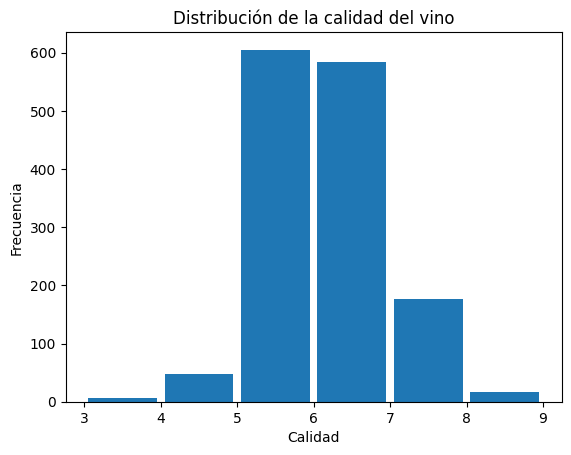

In [16]:
# Histograma de calidad
plt.figure()
df['quality'].plot(kind='hist', bins=range(int(df['quality'].min()), int(df['quality'].max()) + 2), rwidth=0.9)
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

#### Grafica 2

/tmp/ipython-input-1719732323.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_quality, labels=sorted(df['quality'].unique()))


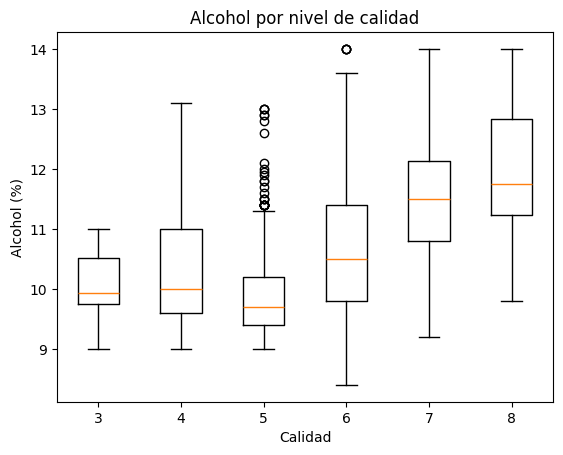

In [17]:
# Boxplot de alcohol por calidad
plt.figure()
data_by_quality = [df[df['quality'] == q]['alcohol'].values for q in sorted(df['quality'].unique())]
plt.boxplot(data_by_quality, labels=sorted(df['quality'].unique()))
plt.title("Alcohol por nivel de calidad")
plt.xlabel("Calidad")
plt.ylabel("Alcohol (%)")
plt.show()

#### Grafica 3

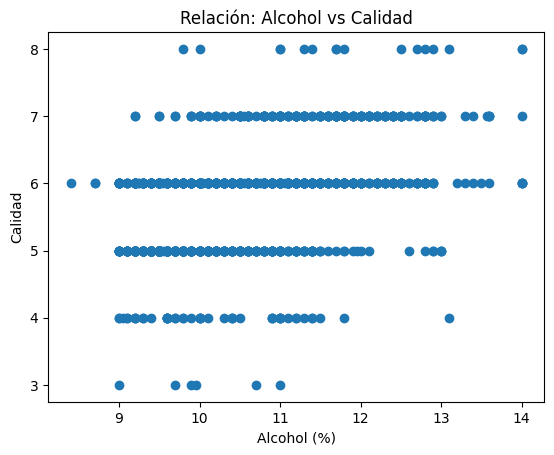

In [18]:
# Dispersión: Alcohol vs Calidad
plt.figure()
plt.scatter(df['alcohol'], df['quality'])
plt.title("Relación: Alcohol vs Calidad")
plt.xlabel("Alcohol (%)")
plt.ylabel("Calidad")
plt.show()


#### Insights

In [23]:
quality_corr = corr['quality'].drop('quality').sort_values(ascending=False)
print("\n Insights principales:")
print("1) El alcohol es el predictor más fuerte de la calidad (corr =", round(quality_corr['alcohol'], 3), ")")
print("2) La acidez volátil se asocia negativamente con la calidad (corr =", round(quality_corr['volatile_acidity'], 3), ")")
print("3) Los sulfatos y el ácido cítrico contribuyen positivamente a la calidad (corr =", round(quality_corr['sulphates'], 3), "y", round(quality_corr['citric_acid'], 3), ")")



 Insights principales:
1) El alcohol es el predictor más fuerte de la calidad (corr = 0.49 )
2) La acidez volátil se asocia negativamente con la calidad (corr = -0.387 )
3) Los sulfatos y el ácido cítrico contribuyen positivamente a la calidad (corr = 0.379 y 0.241 )


## Conclusion 1

El vino con más alcohol suele ser mejor valorado.
Vimos que los vinos con mayor porcentaje de alcohol tienden a tener calificaciones más altas. Esto puede deberse a que el alcohol aporta cuerpo y sabor, lo que hace que el vino sea percibido como de mejor calidad.

## Conclusion 2

Demasiada acidez volátil baja la calidad.
Cuando la acidez volátil es alta, la calidad del vino disminuye. Esto tiene sentido porque una acidez excesiva puede darle al vino un sabor avinagrado o desagradable para el consumidor.

## Conclusion 3

Los detalles marcan la diferencia.
Vinos con más sulfatos y ácido cítrico suelen tener mejor puntuación, ya que estos componentes ayudan al sabor y la estabilidad del vino. En cambio, si hay demasiada densidad, cloruros o dióxido de azufre total, la calidad se ve afectada de forma negativa.